In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

# What we're going to do:

1. Combine all the datasets together
2. Define n emotions
3. Check and remove duplicates
4. Check the distribution of the categories
5. Flatten the distribution

## Load dataframes

In [2]:
raw_df_0 = pd.read_csv('./data/raw/emotions_0.csv', index_col=0)
raw_df_1 = pd.read_csv('./data/raw/emotions_1.csv', index_col=0)
raw_df_2 = pd.read_csv('./data/raw/emotions_2.csv', index_col=0)
raw_df_3 = pd.read_csv('./data/raw/emotions_3.csv', index_col=0)
raw_df_4 = pd.read_csv('./data/raw/emotions_4.csv', index_col=0)
raw_df_5 = pd.read_csv('./data/raw/emotions_5.csv', index_col=0)
raw_df_6 = pd.read_csv('./data/raw/emotions_6.csv', index_col=0)

raw_df_0

,id,date,user,text,emotion
0,1348669486514249730,2021-01-11 16:33:57,Zaquawn5,Me angrily drawing something (sorry it doesn’t...,angry
1,1348662117495312385,2021-01-11 16:04:40,AniruddhaBhakti,Sadguru Shree Aniruddha explains how one shoul...,angry
2,1348660886723055622,2021-01-11 15:59:46,cheesybreadaj,hayden stop looking at my social media i am #a...,angry
3,1348652024657833984,2021-01-11 15:24:34,RepetApp,"Damn, my gf calls me by name 😨😱\n\n#damn #mygi...",angry
4,1348648574007926785,2021-01-11 15:10:51,Flora34574173,It is not within everybody's power to be #angr...,angry
...,...,...,...,...,...
550,1346637816168673280,2021-01-06 02:00:49,ArabellaPalumbo,"Faces 3, 4 &amp; 5\n(Not sure about the lip)\n...",disgust
551,1346319540234252289,2021-01-05 04:56:06,peculiART927,Inside Out Characters tutorial full vid⬇️\nhtt...,disgust
552,1346319517480148998,2021-01-05 04:56:01,peculiART927,"Inside Out Characters pt. 2\n(Anger, Fear, &am...",disgust
553,1346276466263285761,2021-01-05 02:04:56,kimpita,#truth #disgust #shameful \n\nBring on January...,disgust


## Combine datasets

In [3]:
df = pd.concat([raw_df_0, raw_df_1, raw_df_2, raw_df_3, raw_df_4, raw_df_5, raw_df_6])

df

,id,date,user,text,emotion
0,1348669486514249730,2021-01-11 16:33:57,Zaquawn5,Me angrily drawing something (sorry it doesn’t...,angry
1,1348662117495312385,2021-01-11 16:04:40,AniruddhaBhakti,Sadguru Shree Aniruddha explains how one shoul...,angry
2,1348660886723055622,2021-01-11 15:59:46,cheesybreadaj,hayden stop looking at my social media i am #a...,angry
3,1348652024657833984,2021-01-11 15:24:34,RepetApp,"Damn, my gf calls me by name 😨😱\n\n#damn #mygi...",angry
4,1348648574007926785,2021-01-11 15:10:51,Flora34574173,It is not within everybody's power to be #angr...,angry
...,...,...,...,...,...
6773,1346395201712115712,2021-01-05 09:56:45,KingOfCnut,"Tag whoever you want, they get it, you don’t 😂...",angry
6774,1346375559169929216,2021-01-05 08:38:42,Miss_FionaM,Really don't need a brainless so called friend...,angry
6775,1346373563473940486,2021-01-05 08:30:46,RShoppingland,We are a angry!\n\nhttps://t.co/Pel5LBU4h3\n.\...,angry
6776,1346366881922510851,2021-01-05 08:04:13,1200TECHNO,NVM IT IS DOWN AGAIN....... #ihatemylife #iwan...,angry


## Define n emotions

Emotions:
* Joy
* Love
* Disgust
* Constructive feedback
* Anger/hate

In [4]:
df['emotion'].unique()

array(['angry', 'joy', 'advice', 'happy', 'love', 'disgust', nan,
       'Disgust', 'disgusting', 'Disgusting', 'Advice', 'feedback',
       'Feedback', 'anger', 'Anger', 'hate', 'rage', 'Rage', 'Hate',
       'dislike', 'Angry'], dtype=object)

In [5]:
#####

# Remove NaN emotions

indeces = []

for idx, row in enumerate(df['emotion'].isnull()):
    if row == True:
        indeces.append(idx)

[df.iloc[i] for i in indeces]

[id                                       1348246009307164679
 date                                     2021-01-10 12:31:12
 user                                            software4iot
 text       #IoT  Internet of Things. IoT Infrastructures:...
 emotion                                                  NaN
 Name: 10554, dtype: object,
 id         love
 date        NaN
 user        NaN
 text        NaN
 emotion     NaN
 Name:  #love, dtype: object]

In [6]:
df.isnull().sum()

id         0
date       1
user       1
text       1
emotion    2
dtype: int64

In [7]:
df.dropna(inplace=True)

[print(df.iloc[i]) for i in indeces]

#####

id                                       1348245894596943873
date                                     2021-01-10 12:30:45
user                                           confessionbee
text       My ❤️ for him is eternal.\nWishing him a very ...
emotion                                                 love
Name: 10555, dtype: object
id                                       1348245865002098689
date                                     2021-01-10 12:30:38
user                                           simplefasting
text       There's a lot of information on what to do aro...
emotion                                                 love
Name: 10556, dtype: object


[None, None]

In [8]:
df.isnull().sum()

id         0
date       0
user       0
text       0
emotion    0
dtype: int64

In [9]:
df['emotion'].unique()

array(['angry', 'joy', 'advice', 'happy', 'love', 'disgust', 'Disgust',
       'disgusting', 'Disgusting', 'Advice', 'feedback', 'Feedback',
       'anger', 'Anger', 'hate', 'rage', 'Rage', 'Hate', 'dislike',
       'Angry'], dtype=object)

In [10]:
def decode_sentiment(label):
    if label == 'happy':
        return 'joy'
    elif label == 'Disgust' or label == 'disgusting' or label == 'Disgusting':
        return 'disgust'
    elif label == 'advice' or label == 'Advice' or label == 'feedback' or label == 'Feedback':
        return 'constructive feedback'
    elif label == 'Anger' or label == 'angry' or label == 'rage' or label == 'Rage' or label == 'Hate' or label == 'hate' or label == 'Angry' or label == 'anger' or label == 'dislike':
        return 'anger/hate'
    else:
        return label


df['emotion'] = df['emotion'].apply(lambda x: decode_sentiment(x))

df['emotion'].unique()

array(['anger/hate', 'joy', 'constructive feedback', 'love', 'disgust'],
      dtype=object)

In [11]:
df

,id,date,user,text,emotion
0,1348669486514249730,2021-01-11 16:33:57,Zaquawn5,Me angrily drawing something (sorry it doesn’t...,anger/hate
1,1348662117495312385,2021-01-11 16:04:40,AniruddhaBhakti,Sadguru Shree Aniruddha explains how one shoul...,anger/hate
2,1348660886723055622,2021-01-11 15:59:46,cheesybreadaj,hayden stop looking at my social media i am #a...,anger/hate
3,1348652024657833984,2021-01-11 15:24:34,RepetApp,"Damn, my gf calls me by name 😨😱\n\n#damn #mygi...",anger/hate
4,1348648574007926785,2021-01-11 15:10:51,Flora34574173,It is not within everybody's power to be #angr...,anger/hate
...,...,...,...,...,...
6773,1346395201712115712,2021-01-05 09:56:45,KingOfCnut,"Tag whoever you want, they get it, you don’t 😂...",anger/hate
6774,1346375559169929216,2021-01-05 08:38:42,Miss_FionaM,Really don't need a brainless so called friend...,anger/hate
6775,1346373563473940486,2021-01-05 08:30:46,RShoppingland,We are a angry!\n\nhttps://t.co/Pel5LBU4h3\n.\...,anger/hate
6776,1346366881922510851,2021-01-05 08:04:13,1200TECHNO,NVM IT IS DOWN AGAIN....... #ihatemylife #iwan...,anger/hate


## Handle duplicates

In [12]:
df.duplicated(subset=['text'], keep='first').sum()

32374

In [13]:
# Drop duplicates
df.drop_duplicates(subset=['text'], keep='first', inplace=True)

df.duplicated(subset=['text'], keep='first').sum()

0

## Explore categories distribution

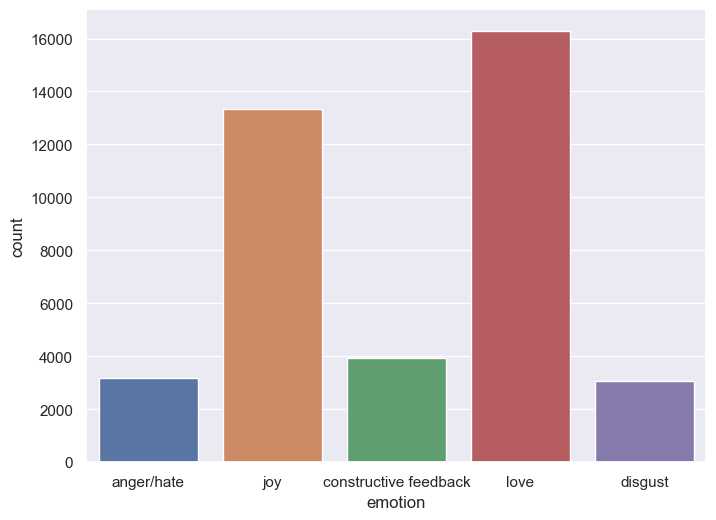

In [14]:
plt.figure(figsize=(8, 6), dpi=100)
sns.countplot(x='emotion', data=df)
plt.show()

In [15]:
df.groupby('emotion').count().text

emotion
anger/hate                3178
constructive feedback     3945
disgust                   3053
joy                      13344
love                     16290
Name: text, dtype: int64

## Flatten distribution

Since there is a disproportionate amount of rows with the "joy" label, I will remove around 15000 rows

In [16]:
# Create joy dataset
joy_df = df[df['emotion'] == 'joy']

joy_df

,id,date,user,text,emotion
100,1348673300860383232,2021-01-11 16:49:06,hamutal1505,@StarbucksKorea I love this #collab between #s...,joy
101,1348673233256652800,2021-01-11 16:48:50,LucidMadeIt,Premiering at 11am cst!! Set a reminder now! C...,joy
102,1348671857109704715,2021-01-11 16:43:22,MassageEnvyHI,We love reading your reviews 💜🌺🌴💪 #massageenvy...,joy
103,1348671751320981505,2021-01-11 16:42:57,lou_bitch,Lots of pigeon visiting the garden this mornin...,joy
104,1348671114185113609,2021-01-11 16:40:25,mvvenkataraman,"#If rain's stay is #longer,\n\nHearts will sin...",joy
...,...,...,...,...,...
16848,1346066110492250112,2021-01-04 12:09:04,happytakepon,"Work started today. I was very busy,but I felt...",joy
16850,1346065721025994752,2021-01-04 12:07:31,boakye_wasty,#HAPPY NEW YEAR#\n\nLet's start the year with ...,joy
16851,1346065244842430465,2021-01-04 12:05:37,JayeetaJg,Smile Is The Best Curve On Our Face....😘😘 \n\n...,joy
454,1348676254959075330,2021-01-11 17:00:51,MarkFlender72,What it means to you? 😌 #madonna #smile #quest...,joy


In [17]:
# Shuffle dataset
joy_df = joy_df.sample(frac=1).reset_index(drop=True)

# Remove 15000 examples from joy dataset
joy_df = joy_df[6000:]

joy_df

,id,date,user,text,emotion
6000,1348107105643884546,2021-01-10 03:19:15,LC22_Elysse,Ok so it takes 6 hrs in a mask for me to start...,joy
6001,1348311771438837760,2021-01-10 16:52:31,KIMTAEPARKSOO,@BTS_twt #RedVelvet #JIMIN #JOY \nOh My Park's...,joy
6002,1346516945072484359,2021-01-05 18:00:31,OneShareHealth,"🎄 🌟 This past #Christmas, #OneShareHealth work...",joy
6003,1348137275725635589,2021-01-10 05:19:08,CristaLea11,"How many of you are happy? Ya know, you feel l...",joy
6004,1347899861987856386,2021-01-09 13:35:44,lookvelvets,DON'T BREAK THE CHAIN 💚\n\nGo to the SMA app a...,joy
...,...,...,...,...,...
13339,1346094142288441345,2021-01-04 14:00:27,stine1online,I love Aruba - One happy Island Jigsaw Puzzle ...,joy
13340,1348025708476436480,2021-01-09 21:55:48,writingforkidz,Buy from Home &amp; Stay Safe this year! #BeMy...,joy
13341,1347574436992610307,2021-01-08 16:02:37,RoseForeverNY,We have a cool GIVEAWAY 🎉 on our Instagram pag...,joy
13342,1346099402071547904,2021-01-04 14:21:21,PipsSkipsltd,And just like that it’s 2021 😯 \n\nHello to ou...,joy


In [18]:
# Remove joy from original df
df = df[df['emotion'] != 'joy']

df.groupby('emotion').count().text

emotion
anger/hate                3178
constructive feedback     3945
disgust                   3053
love                     16290
Name: text, dtype: int64

In [19]:
# Add new joy df to original df
df = pd.concat([df, joy_df])

df

,id,date,user,text,emotion
0,1348669486514249730,2021-01-11 16:33:57,Zaquawn5,Me angrily drawing something (sorry it doesn’t...,anger/hate
1,1348662117495312385,2021-01-11 16:04:40,AniruddhaBhakti,Sadguru Shree Aniruddha explains how one shoul...,anger/hate
2,1348660886723055622,2021-01-11 15:59:46,cheesybreadaj,hayden stop looking at my social media i am #a...,anger/hate
3,1348652024657833984,2021-01-11 15:24:34,RepetApp,"Damn, my gf calls me by name 😨😱\n\n#damn #mygi...",anger/hate
4,1348648574007926785,2021-01-11 15:10:51,Flora34574173,It is not within everybody's power to be #angr...,anger/hate
...,...,...,...,...,...
13339,1346094142288441345,2021-01-04 14:00:27,stine1online,I love Aruba - One happy Island Jigsaw Puzzle ...,joy
13340,1348025708476436480,2021-01-09 21:55:48,writingforkidz,Buy from Home &amp; Stay Safe this year! #BeMy...,joy
13341,1347574436992610307,2021-01-08 16:02:37,RoseForeverNY,We have a cool GIVEAWAY 🎉 on our Instagram pag...,joy
13342,1346099402071547904,2021-01-04 14:21:21,PipsSkipsltd,And just like that it’s 2021 😯 \n\nHello to ou...,joy


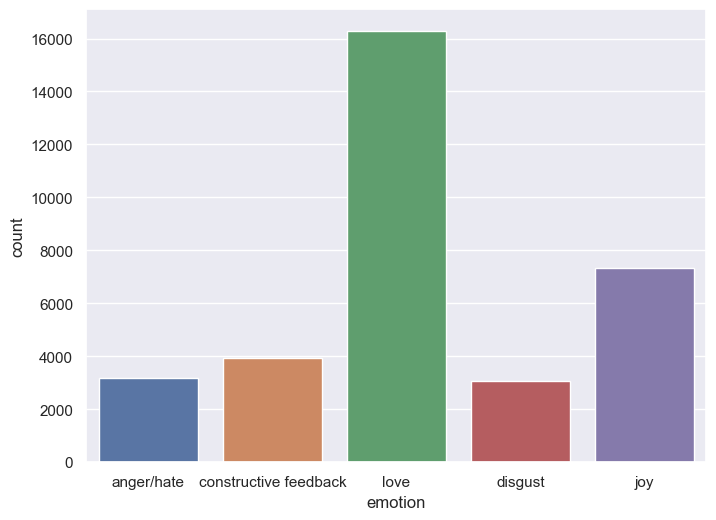

In [20]:
plt.figure(figsize=(8, 6), dpi=100)
sns.countplot(x='emotion', data=df)
plt.show()

In [21]:
df.groupby('emotion').count().text

emotion
anger/hate                3178
constructive feedback     3945
disgust                   3053
joy                       7344
love                     16290
Name: text, dtype: int64

### Now same thing with love label

In [22]:
# Create love dataset
love_df = df[df['emotion'] == 'love']

# Shuffle dataset
love_df = love_df.sample(frac=1).reset_index(drop=True)

# Remove 5000 examples from joy dataset
love_df = love_df[7500:]

# Remove joy from original df
df = df[df['emotion'] != 'love']

# Add new joy df to original df
df = pd.concat([df, love_df])

df

,id,date,user,text,emotion
0,1348669486514249730,2021-01-11 16:33:57,Zaquawn5,Me angrily drawing something (sorry it doesn’t...,anger/hate
1,1348662117495312385,2021-01-11 16:04:40,AniruddhaBhakti,Sadguru Shree Aniruddha explains how one shoul...,anger/hate
2,1348660886723055622,2021-01-11 15:59:46,cheesybreadaj,hayden stop looking at my social media i am #a...,anger/hate
3,1348652024657833984,2021-01-11 15:24:34,RepetApp,"Damn, my gf calls me by name 😨😱\n\n#damn #mygi...",anger/hate
4,1348648574007926785,2021-01-11 15:10:51,Flora34574173,It is not within everybody's power to be #angr...,anger/hate
...,...,...,...,...,...
16285,1347947454323281921,2021-01-09 16:44:51,AnnabethIstvan,the life I've been\ngiven\nis not my own\nso I...,love
16286,1348346890946027521,2021-01-10 19:12:04,MusicManTonyR,Need something for your commute? Check out our...,love
16287,1347931618497982466,2021-01-09 15:41:55,calegashow,#music \n#love\n#amore\n#GUTGUT\n#humo#life\n#...,love
16288,1348316409533587458,2021-01-10 17:10:57,Hum4usSenate,I smelled Love. #Love is not specifically betw...,love


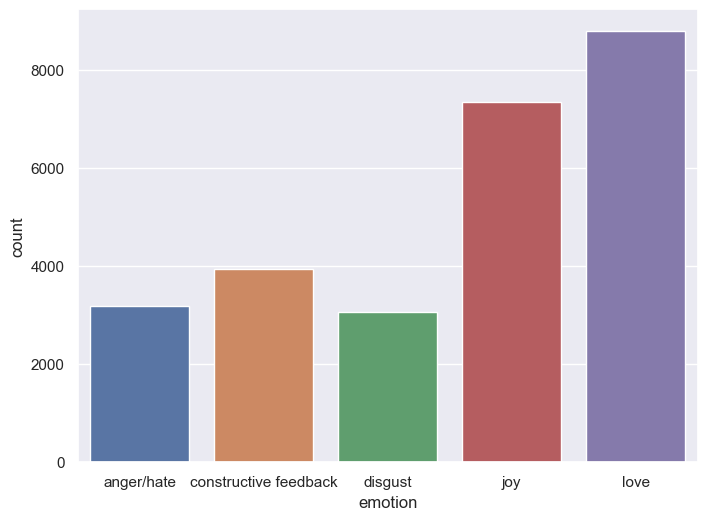

In [23]:
plt.figure(figsize=(8, 6), dpi=100)
sns.countplot(x='emotion', data=df)
plt.show()

In [24]:
df.groupby('emotion').count().text

emotion
anger/hate               3178
constructive feedback    3945
disgust                  3053
joy                      7344
love                     8790
Name: text, dtype: int64

## Explore dataset

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26310 entries, 0 to 16289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       26310 non-null  object
 1   date     26310 non-null  object
 2   user     26310 non-null  object
 3   text     26310 non-null  object
 4   emotion  26310 non-null  object
dtypes: object(5)
memory usage: 1.8+ MB


In [26]:
df.isnull().sum()

id         0
date       0
user       0
text       0
emotion    0
dtype: int64

# Remove hashtags, mentions and links from text

In [27]:
df.text

0        Me angrily drawing something (sorry it doesn’t...
1        Sadguru Shree Aniruddha explains how one shoul...
2        hayden stop looking at my social media i am #a...
3        Damn, my gf calls me by name 😨😱\n\n#damn #mygi...
4        It is not within everybody's power to be #angr...
                               ...                        
16285    the life I've been\ngiven\nis not my own\nso I...
16286    Need something for your commute? Check out our...
16287    #music \n#love\n#amore\n#GUTGUT\n#humo#life\n#...
16288    I smelled Love. #Love is not specifically betw...
16289    You’re welcome 💕 #sprinkles #yum #yummy #sogoo...
Name: text, Length: 26310, dtype: object

In [28]:
import re
import string

# Remove links
def strip_links(text):
    link_regex = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

# Remove hashtags and mentions
def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)


df['text'] = df['text'].apply(lambda t: strip_all_entities(strip_links(t)))

In [29]:
df.text

0        Me angrily drawing something sorry it doesn’t ...
1        Sadguru Shree Aniruddha explains how one shoul...
2              hayden stop looking at my social media i am
3                           Damn my gf calls me by name 😨😱
4        It is not within everybody s power to be With ...
                               ...                        
16285    the life I ve been given is not my own so I ll...
16286    Need something for your commute Check out our ...
16287                                                     
16288    I smelled Love is not specifically between a m...
16289                                     You’re welcome 💕
Name: text, Length: 26310, dtype: object

### Remove row in which the field text is empty

In [30]:
df[df['text'] == '']

,id,date,user,text,emotion
7163,1346456667865681920,2021-01-05 14:01:00,BREADHUNTER1,,constructive feedback
6421,1347811443094253568,2021-01-09 07:44:23,441Grados,,joy
6509,1346139513471557633,2021-01-04 17:00:44,the_bridge4,,joy
6567,1348596379157897216,2021-01-11 11:43:27,flower2017sho,,joy
6724,1346501914465329153,2021-01-05 17:00:47,the_bridge4,,joy
6924,1346494024971145232,2021-01-05 16:29:26,VaskT,,joy
8606,1346094117684707329,2021-01-04 14:00:21,the_bridge4,,joy
8831,1348380294332743680,2021-01-10 21:24:48,NaomiKilchhofer,,joy
8859,1346154597799387145,2021-01-04 18:00:41,the_bridge4,,joy
9347,1346199855060946945,2021-01-04 21:00:31,the_bridge4,,joy


In [31]:
# Replace empty cells with NaN
df['text'].replace('', np.nan, inplace=True)

df[df['text'] == '']

,id,date,user,text,emotion


In [32]:
df.isnull().sum()

id          0
date        0
user        0
text       36
emotion     0
dtype: int64

In [33]:
# Drop those rows
df.dropna(subset=['text'], inplace=True)

df.isnull().sum()

id         0
date       0
user       0
text       0
emotion    0
dtype: int64

# Finalize dataframe and export

In [34]:
# Shuffle dataframe
df = df.sample(frac=1).reset_index(drop=True)

# Get only text and emotion columns
df = df[[ 'text', 'emotion' ]]

df

,text,emotion
0,Dreaming of summer just seen on our walk does ...,joy
1,Imagine being some of these low lives than ali...,anger/hate
2,Brad s greatest fear on his startup journey is...,constructive feedback
3,This is my own business please go check it out...,joy
4,or even winter gatherings Book thru our website,joy
...,...,...
26269,Check out The MAC on Patreon for all your spor...,constructive feedback
26270,This picture is the literal definition of bein...,disgust
26271,BRAND NEW PROJECT LAUNCHED ⚠️ We re Tackling F...,constructive feedback
26272,The Bible talks a lot about JOY Galatians 5 22...,joy


In [35]:
df.to_csv('./data/edited/emotions.csv')